In [1]:
# gradient Boosting -----------
# python3 
# Yazhou,Liu
# -----------------------------

In [2]:
import numpy as np
import pandas as pd
from  sklearn import ensemble
from  sklearn import datasets
from  sklearn.utils import shuffle
from  sklearn.metrics import mean_squared_error
from  sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

In [3]:
# Load data 
boston          = datasets.load_boston()
X,y             = shuffle(boston.data,boston.target,random_state = 12)
X               = X.astype(np.float32)
train_data_lens = int((X.shape[0]) * 0.9)
X_train,y_train = X[:train_data_lens],y[:train_data_lens]
X_test,y_test   = X[train_data_lens:],y[train_data_lens:]

In [4]:
params = {'loss':'ls','learning_rate':0.01,
        'n_estimators':100,'min_samples_split':2,
         'max_depth':4}
model = GradientBoostingRegressor(**params)
model.fit(X_train,y_train)
mse   = mean_squared_error(y_test,model.predict(X_test))
print("MSE: %0.4f"%(mse))

MSE: 22.2345


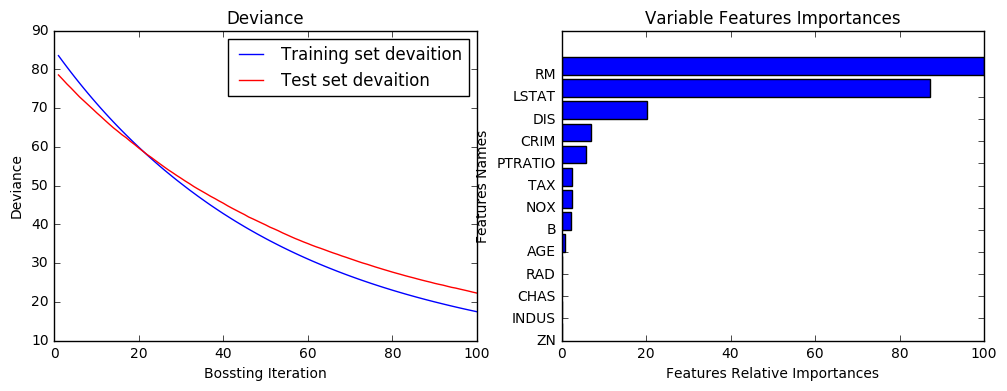

In [7]:
# plot the 
test_score = np.zeros((params['n_estimators'],),dtype = np.float64)
for i,y_pred in enumerate(model.staged_predict(X_test)):  #stage_predict=>Predict regression target at each stage for X
    test_score[i] = model.loss_(y_test,y_pred) # loss_ : LossFunction
    
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1,model.train_score_,'b-',label = 'Training set devaition')
plt.plot(np.arange(params['n_estimators']) + 1,test_score,'r-',        label = 'Test set devaition')
plt.legend(loc = 'upper right')
plt.xlabel('Bossting Iteration')
plt.ylabel("Deviance")

plt.subplot(1,2,2)
feature_importances = model.feature_importances_ # float type 
# 做一个均一化
feature_importances_scaler = 100*(feature_importances/feature_importances.max()) # 转成百分制
sorted_index  = np.argsort(feature_importances_scaler) # 从小到大后的Index - 索引值
x_pos         = np.arange(sorted_index.shape[0])
plt.barh(x_pos,feature_importances_scaler[sorted_index])
plt.yticks(x_pos,boston.feature_names[sorted_index])
plt.title("Variable Features Importances")
plt.xlabel('Features Relative Importances')
plt.ylabel('Features Names')
plt.show()

In [8]:
model.feature_importances_

array([3.06144934e-02, 5.07964766e-05, 1.90729034e-04, 3.15688533e-04,
       1.05317095e-02, 4.37324179e-01, 4.00364170e-03, 8.87943009e-02,
       7.05695874e-04, 1.12794962e-02, 2.54381320e-02, 9.89080551e-03,
       3.80860332e-01])

In [9]:
np.argsort(model.feature_importances_).shape[0]

13

In [10]:
model.feature_importances_[np.argsort(model.feature_importances_)]

array([5.07964766e-05, 1.90729034e-04, 3.15688533e-04, 7.05695874e-04,
       4.00364170e-03, 9.89080551e-03, 1.05317095e-02, 1.12794962e-02,
       2.54381320e-02, 3.06144934e-02, 8.87943009e-02, 3.80860332e-01,
       4.37324179e-01])

In [11]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')